## Lab | Unsupervised learning intro

In [1]:
import pandas as pd
import config

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json

import pprint

In [2]:
#Initialize credentials

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = config.client_id,
                                                            client_secret = config.client_secret))

### Getting the audio features

In [3]:
def audio_features_df(dataframe):
    audio_f = []
    
    for index, row in dataframe.iterrows():
        song = row['song']
        artist = row['artist']
        
        query = f"{song} {artist}"
        song_result = sp.search(q=query, limit=1)
        
        if song_result['tracks']['items']:
            track_id = song_result['tracks']['items'][0]['id']
            
            audio_info = sp.audio_features(track_id)[0]
            audio_info['track'] = song_result['tracks']['items'][0]['name']
            audio_info['artist'] = song_result['tracks']['items'][0]['artists'][0]['name']
            
            audio_f.append(audio_info)
    
    audio_df = pd.DataFrame(audio_f)
    return audio_df

In [4]:
full_song_df = pd.read_csv('full_song_df_2023-08-19.csv')
full_song_df.head(2)

,song,artist
0,West End Blues,Louis Armstrong
1,St Louis Blues,Bessie Smith


In [5]:
full_song_df.shape

(1794, 2)

In [6]:
resulting_audio_df = audio_features_df(full_song_df)

In [7]:
print(len(resulting_audio_df))
resulting_audio_df.head()

1791


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track,artist
0,0.588,0.207,3,-12.622,1,0.0553,0.971,0.66000,0.0823,0.365,83.716,audio_features,1yvkKwvTiQmq0Saw1quM9l,spotify:track:1yvkKwvTiQmq0Saw1quM9l,https://api.spotify.com/v1/tracks/1yvkKwvTiQmq...,https://api.spotify.com/v1/audio-analysis/1yvk...,198733,4,West End Blues,Louis Armstrong & His Hot Five
1,0.355,0.114,10,-15.968,1,0.0588,0.991,0.00686,0.1080,0.258,69.902,audio_features,3cw8eL6EI64aCw9Mw6Ipgd,spotify:track:3cw8eL6EI64aCw9Mw6Ipgd,https://api.spotify.com/v1/tracks/3cw8eL6EI64a...,https://api.spotify.com/v1/audio-analysis/3cw8...,189600,4,St. Louis Blues,Bessie Smith
2,0.479,0.356,5,-10.716,1,0.0393,0.836,0.00841,0.0974,0.624,203.041,audio_features,6DIA7G45AQv9PkirGnHPb9,spotify:track:6DIA7G45AQv9PkirGnHPb9,https://api.spotify.com/v1/tracks/6DIA7G45AQv9...,https://api.spotify.com/v1/audio-analysis/6DIA...,221545,4,"T"" for Texas (Blue Yodel, No. 1)",Ramblin' Jack Elliott
3,0.515,0.222,0,-16.918,0,0.0575,0.821,0.00193,0.1900,0.350,98.358,audio_features,3BFRqZFLSrqtQr6cjHbAxU,spotify:track:3BFRqZFLSrqtQr6cjHbAxU,https://api.spotify.com/v1/tracks/3BFRqZFLSrqt...,https://api.spotify.com/v1/audio-analysis/3BFR...,237773,4,Ain't Misbehavin',Fats Waller
4,0.486,0.417,5,-9.556,1,0.2020,0.409,0.00000,0.5830,0.825,101.150,audio_features,6sXVv2wom0C6AJPSSeRfrK,spotify:track:6sXVv2wom0C6AJPSSeRfrK,https://api.spotify.com/v1/tracks/6sXVv2wom0C6...,https://api.spotify.com/v1/audio-analysis/6sXV...,228667,4,Wildwood Flower - Live at San Quentin State Pr...,The Carter Family


In [8]:
resulting_audio_df.to_csv('audio_features_df.csv', index=False)

### Kmeans Clustering 

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
data = pd.read_csv('audio_features_df.csv')
data.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track,artist
0,0.588,0.207,3,-12.622,1,0.0553,0.971,0.66000,0.0823,0.365,83.716,audio_features,1yvkKwvTiQmq0Saw1quM9l,spotify:track:1yvkKwvTiQmq0Saw1quM9l,https://api.spotify.com/v1/tracks/1yvkKwvTiQmq...,https://api.spotify.com/v1/audio-analysis/1yvk...,198733,4,West End Blues,Louis Armstrong & His Hot Five
1,0.355,0.114,10,-15.968,1,0.0588,0.991,0.00686,0.1080,0.258,69.902,audio_features,3cw8eL6EI64aCw9Mw6Ipgd,spotify:track:3cw8eL6EI64aCw9Mw6Ipgd,https://api.spotify.com/v1/tracks/3cw8eL6EI64a...,https://api.spotify.com/v1/audio-analysis/3cw8...,189600,4,St. Louis Blues,Bessie Smith


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1791 non-null   float64
 1   energy            1791 non-null   float64
 2   key               1791 non-null   int64  
 3   loudness          1791 non-null   float64
 4   mode              1791 non-null   int64  
 5   speechiness       1791 non-null   float64
 6   acousticness      1791 non-null   float64
 7   instrumentalness  1791 non-null   float64
 8   liveness          1791 non-null   float64
 9   valence           1791 non-null   float64
 10  tempo             1791 non-null   float64
 11  type              1791 non-null   object 
 12  id                1791 non-null   object 
 13  uri               1791 non-null   object 
 14  track_href        1791 non-null   object 
 15  analysis_url      1791 non-null   object 
 16  duration_ms       1791 non-null   int64  


In [12]:
columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'track', 'artist']
columns_to_drop

['type', 'id', 'uri', 'track_href', 'analysis_url', 'track', 'artist']

In [13]:
X = data.drop(columns_to_drop, axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.588,0.207,3,-12.622,1,0.0553,0.971000,0.66000,0.0823,0.365,83.716,198733,4
1,0.355,0.114,10,-15.968,1,0.0588,0.991000,0.00686,0.1080,0.258,69.902,189600,4
2,0.479,0.356,5,-10.716,1,0.0393,0.836000,0.00841,0.0974,0.624,203.041,221545,4
3,0.515,0.222,0,-16.918,0,0.0575,0.821000,0.00193,0.1900,0.350,98.358,237773,4
4,0.486,0.417,5,-9.556,1,0.2020,0.409000,0.00000,0.5830,0.825,101.150,228667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,0.769,0.959,5,-8.717,0,0.0634,0.000208,0.63100,0.3310,0.893,116.168,473067,4
1787,0.717,0.952,6,-4.902,1,0.0481,0.150000,0.00000,0.1660,0.665,126.993,235733,4
1788,0.751,0.704,2,-10.951,1,0.0593,0.001320,0.89900,0.5610,0.679,142.015,259667,4
1789,0.775,0.707,3,-8.700,0,0.0444,0.001490,0.02690,0.0486,0.971,122.990,560387,4


In [14]:
feature_names = X.columns
feature_names

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [15]:
X['time_signature'].value_counts()

4    1640
3     123
5      16
1      12
Name: time_signature, dtype: int64

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = feature_names)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.126926,-1.508061,-0.569658,-0.795992,0.634434,-0.282491,1.719640,2.519465,-0.656436,-0.830021,-1.266019,-0.380380,0.220149
1,-1.538997,-1.895091,1.416934,-1.590696,0.634434,-0.244134,1.777495,-0.340483,-0.491541,-1.252490,-1.759722,-0.485663,0.220149
2,-0.787509,-0.887981,-0.002060,-0.343301,0.634434,-0.457834,1.329117,-0.333696,-0.559552,0.192590,2.998580,-0.117410,0.220149
3,-0.569335,-1.445637,-1.421054,-1.816329,-1.576209,-0.258381,1.285725,-0.362070,0.034584,-0.889246,-0.742723,0.069662,0.220149
4,-0.745086,-0.634123,-0.002060,-0.067792,0.634434,1.325194,0.093907,-0.370521,2.556134,0.986199,-0.642939,-0.035309,0.220149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,0.970004,1.621468,-0.002060,0.131478,-1.576209,-0.193723,-1.088631,2.392481,0.939262,1.254684,-0.106205,2.782068,0.220149
1787,0.654864,1.592337,0.281739,1.037573,0.634434,-0.361395,-0.655319,-0.370521,-0.119404,0.354470,0.280673,0.046146,0.220149
1788,0.860917,0.560258,-0.853456,-0.399116,0.634434,-0.238655,-1.085415,3.565990,2.414979,0.409747,0.817550,0.322050,0.220149
1789,1.006367,0.572743,-0.569658,0.135516,-1.576209,-0.401944,-1.084923,-0.252732,-0.872661,1.562652,0.137609,3.788669,0.220149


In [17]:
kmeans = KMeans(n_clusters=8, random_state=42, verbose=1)
kmeans.fit(X)

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Initialization complete
Iteration 0, inertia 20612.722841035666.
Iteration 1, inertia 15145.12372392982.
Iteration 2, inertia 14716.826721331956.
Iteration 3, inertia 14352.899090576804.
Iteration 4, inertia 14188.827589462828.
Iteration 5, inertia 14153.652534161614.
Iteration 6, inertia 14130.661927674202.
Iteration 7, inertia 14124.978592045154.
Iteration 8, inertia 14123.646730468512.
Iteration 9, inertia 14122.864601628618.
Iteration 10, inertia 14122.082816765998.
Iteration 11, inertia 14121.33451326982.
Iteration 12, inertia 14121.087741805597.
Iteration 13, inertia 14120.85613822456.
Iteration 14, inertia 14120.796669621355.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 18823.23398945337.
Iteration 1, inertia 14791.15900703188.
Iteration 2, inertia 14591.702790897707.
Iteration 3, inertia 14533.95967922121.
Iteration 4, inertia 14489.386309258942.
Iteration 5, inertia 14455.786806329741.
Iteration 6, inertia 14431.004047456163.
Iter

KMeans(random_state=42, verbose=1)

In [18]:
kmeans.inertia_

13569.493023812991

In [19]:
clusters = kmeans.predict(X)
X["cluster"] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,-0.126926,-1.508061,-0.569658,-0.795992,0.634434,-0.282491,1.719640,2.519465,-0.656436,-0.830021,-1.266019,-0.380380,0.220149,7
1,-1.538997,-1.895091,1.416934,-1.590696,0.634434,-0.244134,1.777495,-0.340483,-0.491541,-1.252490,-1.759722,-0.485663,0.220149,5
2,-0.787509,-0.887981,-0.002060,-0.343301,0.634434,-0.457834,1.329117,-0.333696,-0.559552,0.192590,2.998580,-0.117410,0.220149,5
3,-0.569335,-1.445637,-1.421054,-1.816329,-1.576209,-0.258381,1.285725,-0.362070,0.034584,-0.889246,-0.742723,0.069662,0.220149,5
4,-0.745086,-0.634123,-0.002060,-0.067792,0.634434,1.325194,0.093907,-0.370521,2.556134,0.986199,-0.642939,-0.035309,0.220149,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,0.970004,1.621468,-0.002060,0.131478,-1.576209,-0.193723,-1.088631,2.392481,0.939262,1.254684,-0.106205,2.782068,0.220149,0
1787,0.654864,1.592337,0.281739,1.037573,0.634434,-0.361395,-0.655319,-0.370521,-0.119404,0.354470,0.280673,0.046146,0.220149,1
1788,0.860917,0.560258,-0.853456,-0.399116,0.634434,-0.238655,-1.085415,3.565990,2.414979,0.409747,0.817550,0.322050,0.220149,7
1789,1.006367,0.572743,-0.569658,0.135516,-1.576209,-0.401944,-1.084923,-0.252732,-0.872661,1.562652,0.137609,3.788669,0.220149,0


In [20]:
X.cluster.value_counts().sort_index()

0    277
1    434
2    106
3     98
4    149
5    363
6    238
7    126
Name: cluster, dtype: int64

In [21]:
K = range(2,15)
inertia = []

for k in K:
    print(f'Testing k = {k}')
    kmeans = KMeans(n_clusters = k,
                    random_state = 42,
                   verbose = 1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
inertia

Testing k = 2
Initialization complete
Iteration 0, inertia 44712.733862150475.
Iteration 1, inertia 25850.643657149434.
Iteration 2, inertia 23654.336886220517.
Iteration 3, inertia 23638.716077063793.
Iteration 4, inertia 23636.36861567718.
Iteration 5, inertia 23632.266686784635.
Iteration 6, inertia 23630.230386492087.
Iteration 7, inertia 23628.979597847087.
Iteration 8, inertia 23628.059179119602.
Iteration 9, inertia 23626.952888711337.
Iteration 10, inertia 23626.30016391471.
Converged at iteration 10: center shift 6.996840911055086e-05 within tolerance 0.00013292928309089543.
Initialization complete
Iteration 0, inertia 40617.79124917771.
Iteration 1, inertia 23947.269918326565.
Iteration 2, inertia 23630.97346003309.
Iteration 3, inertia 23608.10312806261.
Iteration 4, inertia 23598.460022421074.
Iteration 5, inertia 23586.930103328967.
Iteration 6, inertia 23570.76475165218.
Iteration 7, inertia 23555.476169523336.
Iteration 8, inertia 23548.437497867446.
Iteration 9, inertia

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 4, inertia 23639.934986469947.
Iteration 5, inertia 23636.522466667455.
Iteration 6, inertia 23634.274196737217.
Iteration 7, inertia 23633.522284457427.
Iteration 8, inertia 23632.205070983477.
Iteration 9, inertia 23630.648125635475.
Iteration 10, inertia 23628.79036797893.
Iteration 11, inertia 23627.080721355644.
Iteration 12, inertia 23626.31584076085.
Converged at iteration 12: center shift 8.80611004967173e-05 within tolerance 0.00013292928309089543.
Initialization complete
Iteration 0, inertia 45398.63270985323.
Iteration 1, inertia 24011.07337572498.
Iteration 2, inertia 23712.963582878794.
Iteration 3, inertia 23673.729599584603.
Iteration 4, inertia 23660.560127431952.
Iteration 5, inertia 23644.94632704199.
Iteration 6, inertia 23637.127045058267.
Iteration 7, inertia 23635.563337295123.
Iteration 8, inertia 23634.33694791828.
Iteration 9, inertia 23632.930413039627.
Iteration 10, inertia 23631.473731719158.
Iteration 11, inertia 23628.50357130251.
Iteration 12, i

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 4, inertia 20989.78222610404.
Iteration 5, inertia 20967.054357697387.
Iteration 6, inertia 20957.3868277457.
Iteration 7, inertia 20950.578847529512.
Iteration 8, inertia 20948.742675711157.
Iteration 9, inertia 20947.834686713715.
Iteration 10, inertia 20946.79882274528.
Iteration 11, inertia 20946.421673425655.
Iteration 12, inertia 20946.316626290954.
Iteration 13, inertia 20946.107556639134.
Converged at iteration 13: center shift 0.00012994796625972742 within tolerance 0.00013292928309089543.
Initialization complete
Iteration 0, inertia 30248.354889545655.
Iteration 1, inertia 21374.44677257633.
Iteration 2, inertia 21289.31997768316.
Iteration 3, inertia 21211.125303067645.
Iteration 4, inertia 21122.65497253425.
Iteration 5, inertia 21074.671201985904.
Iteration 6, inertia 21062.22009644183.
Iteration 7, inertia 21059.953612946156.
Iteration 8, inertia 21056.9520400647.
Iteration 9, inertia 21054.13661229905.
Iteration 10, inertia 21053.46337160416.
Iteration 11, iner

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 0, inertia 27735.61543898137.
Iteration 1, inertia 19378.440088193824.
Iteration 2, inertia 19152.51597044297.
Iteration 3, inertia 19066.411467613634.
Iteration 4, inertia 19049.782079130524.
Iteration 5, inertia 19046.996189299567.
Iteration 6, inertia 19042.69013635447.
Iteration 7, inertia 19040.899249805.
Iteration 8, inertia 19040.159452529642.
Iteration 9, inertia 19039.97642913886.
Iteration 10, inertia 19039.5557769776.
Iteration 11, inertia 19036.3683136725.
Iteration 12, inertia 19032.22757881264.
Iteration 13, inertia 19025.380656174304.
Iteration 14, inertia 19015.363120467988.
Iteration 15, inertia 19007.062507154224.
Iteration 16, inertia 19000.855178084876.
Iteration 17, inertia 18996.891032926014.
Iteration 18, inertia 18995.077588395292.
Iteration 19, inertia 18994.85929727671.
Iteration 20, inertia 18994.58275396131.
Iteration 21, inertia 18992.55684047399.
Iteration 22, inertia 18989.791403439387.
Iteration 23, inertia 18985.849288005.
Iteration 24, inerti

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 0, inertia 26081.00253379308.
Iteration 1, inertia 19205.119174998636.
Iteration 2, inertia 18469.202123060993.
Iteration 3, inertia 18159.323571186866.
Iteration 4, inertia 18052.112515436787.
Iteration 5, inertia 18016.83628018123.
Iteration 6, inertia 18000.552307302343.
Iteration 7, inertia 17996.301399782147.
Iteration 8, inertia 17995.589465169804.
Iteration 9, inertia 17994.5465533947.
Iteration 10, inertia 17994.205242379125.
Iteration 11, inertia 17993.54815434627.
Iteration 12, inertia 17992.716275924704.
Iteration 13, inertia 17992.216073259002.
Iteration 14, inertia 17991.759272493724.
Iteration 15, inertia 17991.17831061136.
Converged at iteration 15: center shift 0.00011291105655478916 within tolerance 0.00013292928309089543.
Initialization complete
Iteration 0, inertia 24795.5108601506.
Iteration 1, inertia 17693.66677182935.
Iteration 2, inertia 17433.643902915454.
Iteration 3, inertia 17362.70561063398.
Iteration 4, inertia 17315.271927601447.
Iteration 5, in

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 0, inertia 24088.95360842139.
Iteration 1, inertia 17150.227058156903.
Iteration 2, inertia 16650.91477660007.
Iteration 3, inertia 16462.59440744275.
Iteration 4, inertia 16404.949932383523.
Iteration 5, inertia 16386.167520074105.
Iteration 6, inertia 16381.922837687845.
Iteration 7, inertia 16374.184488730003.
Iteration 8, inertia 16361.781405734338.
Iteration 9, inertia 16355.216946606812.
Iteration 10, inertia 16351.101956150205.
Iteration 11, inertia 16347.844758491774.
Iteration 12, inertia 16343.769449173906.
Iteration 13, inertia 16340.5534056935.
Iteration 14, inertia 16338.201350804464.
Iteration 15, inertia 16336.883837380712.
Iteration 16, inertia 16336.343801425146.
Iteration 17, inertia 16336.109702128226.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 23786.220913134795.
Iteration 1, inertia 18079.14241912978.
Iteration 2, inertia 17602.071679347966.
Iteration 3, inertia 17068.749974182596.
Iteration 4, inertia 1688

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 1, inertia 17263.92119873409.
Iteration 2, inertia 16866.815876504355.
Iteration 3, inertia 16177.889993983386.
Iteration 4, inertia 15603.679469584597.
Iteration 5, inertia 15565.12485036321.
Iteration 6, inertia 15559.592251921447.
Iteration 7, inertia 15554.16712911635.
Iteration 8, inertia 15550.412653047584.
Iteration 9, inertia 15549.323675972517.
Iteration 10, inertia 15548.116355916527.
Iteration 11, inertia 15547.626731833618.
Iteration 12, inertia 15547.553859404798.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 25492.788391730654.
Iteration 1, inertia 17774.58408461228.
Iteration 2, inertia 16736.874626057837.
Iteration 3, inertia 15284.214492210074.
Iteration 4, inertia 14836.728781494876.
Iteration 5, inertia 14805.723213800213.
Iteration 6, inertia 14788.094273220926.
Iteration 7, inertia 14771.581075976279.
Iteration 8, inertia 14758.077465075346.
Iteration 9, inertia 14727.745851296397.
Iteration 10, inertia 14691.

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 0, inertia 23426.81756450059.
Iteration 1, inertia 16261.203052170544.
Iteration 2, inertia 15031.778433395533.
Iteration 3, inertia 14637.58367970683.
Iteration 4, inertia 14621.373186141647.
Iteration 5, inertia 14619.42747043513.
Iteration 6, inertia 14618.97245915444.
Iteration 7, inertia 14618.676157611351.
Iteration 8, inertia 14618.516572185845.
Iteration 9, inertia 14618.486880786859.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 24302.48936449565.
Iteration 1, inertia 16761.977487102773.
Iteration 2, inertia 16290.914436814699.
Iteration 3, inertia 16217.097642353485.
Iteration 4, inertia 16158.60922947744.
Iteration 5, inertia 16108.672789053086.
Iteration 6, inertia 16041.274006118601.
Iteration 7, inertia 15911.35857836933.
Iteration 8, inertia 15618.811786169163.
Iteration 9, inertia 15017.682251912103.
Iteration 10, inertia 14827.25124756939.
Iteration 11, inertia 14821.708129571265.
Iteration 12, inertia 14820.162078

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 4, inertia 14761.641202319166.
Iteration 5, inertia 14724.787969310968.
Iteration 6, inertia 14631.58093248999.
Iteration 7, inertia 14515.408270031152.
Iteration 8, inertia 14172.913214054872.
Iteration 9, inertia 13602.942076169813.
Iteration 10, inertia 13370.82780360031.
Iteration 11, inertia 13363.988017068606.
Iteration 12, inertia 13360.144902416894.
Iteration 13, inertia 13358.085012678324.
Iteration 14, inertia 13355.66971354238.
Iteration 15, inertia 13351.872789985127.
Iteration 16, inertia 13348.69774740368.
Iteration 17, inertia 13347.216061744157.
Iteration 18, inertia 13346.75695965746.
Iteration 19, inertia 13346.53719284616.
Iteration 20, inertia 13345.505920398662.
Iteration 21, inertia 13344.724772922866.
Iteration 22, inertia 13343.376891827633.
Iteration 23, inertia 13341.256298245686.
Iteration 24, inertia 13338.773731299161.
Iteration 25, inertia 13332.616838930433.
Iteration 26, inertia 13325.265001230151.
Iteration 27, inertia 13321.620658217349.
Iter

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Initialization complete
Iteration 0, inertia 20834.70335501719.
Iteration 1, inertia 13461.742785953978.
Iteration 2, inertia 13164.28283337291.
Iteration 3, inertia 13095.414773933908.
Iteration 4, inertia 13069.30569610607.
Iteration 5, inertia 13061.480647460241.
Iteration 6, inertia 13057.083571312804.
Iteration 7, inertia 13053.821932225179.
Iteration 8, inertia 13047.254934009787.
Iteration 9, inertia 13044.9824767922.
Iteration 10, inertia 13044.107429206528.
Iteration 11, inertia 13043.545607146454.
Iteration 12, inertia 13043.20367343989.
Iteration 13, inertia 13042.985577070605.
Iteration 14, inertia 13042.813433783618.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 20362.698483504646.
Iteration 1, inertia 14305.964541101965.
Iteration 2, inertia 13841.872118473322.
Iteration 3, inertia 13718.208815933758.
Iteration 4, inertia 13665.215326733014.
Iteration 5, inertia 13618.574195903078.
Iteration 6, inertia 13539.733766085557.
Iter

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 0, inertia 21029.14976475373.
Iteration 1, inertia 15412.070214348301.
Iteration 2, inertia 14149.326618349633.
Iteration 3, inertia 13452.62086461714.
Iteration 4, inertia 13111.211681555045.
Iteration 5, inertia 12809.811600070454.
Iteration 6, inertia 12706.025111544794.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 19540.59288545458.
Iteration 1, inertia 14207.311511629443.
Iteration 2, inertia 13573.184379532167.
Iteration 3, inertia 13113.738746081268.
Iteration 4, inertia 12912.964901468356.
Iteration 5, inertia 12880.681546773309.
Iteration 6, inertia 12876.468679228125.
Iteration 7, inertia 12869.72516110112.
Iteration 8, inertia 12864.533152727903.
Iteration 9, inertia 12863.509123326196.
Iteration 10, inertia 12863.11853660702.
Iteration 11, inertia 12863.082312305924.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 19882.276959510054.
Iteration 1, inertia 14963.292394261562.
I

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 5, inertia 12523.708919704193.
Iteration 6, inertia 12519.317836967351.
Iteration 7, inertia 12516.583858141148.
Iteration 8, inertia 12514.101231882945.
Iteration 9, inertia 12513.286316539501.
Iteration 10, inertia 12512.586858190212.
Iteration 11, inertia 12511.281042761659.
Iteration 12, inertia 12509.547701868267.
Iteration 13, inertia 12508.309272907181.
Iteration 14, inertia 12506.15653545652.
Iteration 15, inertia 12502.771792897907.
Iteration 16, inertia 12498.386259332165.
Iteration 17, inertia 12490.04374376741.
Iteration 18, inertia 12486.101082054425.
Iteration 19, inertia 12484.423084323545.
Iteration 20, inertia 12482.759432523537.
Iteration 21, inertia 12481.861895158489.
Iteration 22, inertia 12479.79592345578.
Iteration 23, inertia 12477.666929783976.
Iteration 24, inertia 12477.029702156891.
Iteration 25, inertia 12476.016475577948.
Iteration 26, inertia 12475.827177641802.
Iteration 27, inertia 12475.756920347712.
Converged at iteration 27: strict converge

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Iteration 0, inertia 17641.604609184367.
Iteration 1, inertia 12988.921690104444.
Iteration 2, inertia 12526.598823650067.
Iteration 3, inertia 12405.80396920011.
Iteration 4, inertia 12365.081322673273.
Iteration 5, inertia 12347.144091934602.
Iteration 6, inertia 12322.836526468476.
Iteration 7, inertia 12302.304782371213.
Iteration 8, inertia 12286.32154708075.
Iteration 9, inertia 12267.748650550842.
Iteration 10, inertia 12250.763176675791.
Iteration 11, inertia 12241.61525692872.
Iteration 12, inertia 12237.162680259793.
Iteration 13, inertia 12234.516500037895.
Iteration 14, inertia 12231.412212308784.
Iteration 15, inertia 12224.464180667197.
Iteration 16, inertia 12216.439680458147.
Iteration 17, inertia 12213.846645327743.
Iteration 18, inertia 12211.802700669157.
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 18353.69213236851.
Iteration 1, inertia 12570.230204158668.
Iteration 2, inertia 12344.02260448517.
Iteration 3, inertia 12

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Initialization complete
Iteration 0, inertia 18077.415977158355.
Iteration 1, inertia 12392.12753406534.
Iteration 2, inertia 12096.088594664556.
Iteration 3, inertia 11971.544112049743.
Iteration 4, inertia 11922.683754554935.
Iteration 5, inertia 11905.361610691089.
Iteration 6, inertia 11884.666810159404.
Iteration 7, inertia 11871.828039438533.
Iteration 8, inertia 11860.906357163209.
Iteration 9, inertia 11856.495041015442.
Iteration 10, inertia 11852.250806071817.
Iteration 11, inertia 11847.92033926766.
Iteration 12, inertia 11844.839264980521.
Iteration 13, inertia 11842.091586290888.
Iteration 14, inertia 11840.505155786286.
Iteration 15, inertia 11839.018187151389.
Iteration 16, inertia 11837.023229439303.
Iteration 17, inertia 11833.589460615152.
Iteration 18, inertia 11832.09559298913.
Iteration 19, inertia 11831.840259676643.
Iteration 20, inertia 11830.992762467607.
Iteration 21, inertia 11830.383014208059.
Iteration 22, inertia 11829.166751003499.
Iteration 23, inertia 1

[23546.447005502196,
 20946.03999455153,
 18983.37716609685,
 17081.273252010717,
 15679.605403406784,
 14622.285458087777,
 13569.493023812991,
 13185.632815613164,
 12861.716954050653,
 12544.577618268208,
 12222.690183176786,
 11943.237968544765,
 11788.195607415426]

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

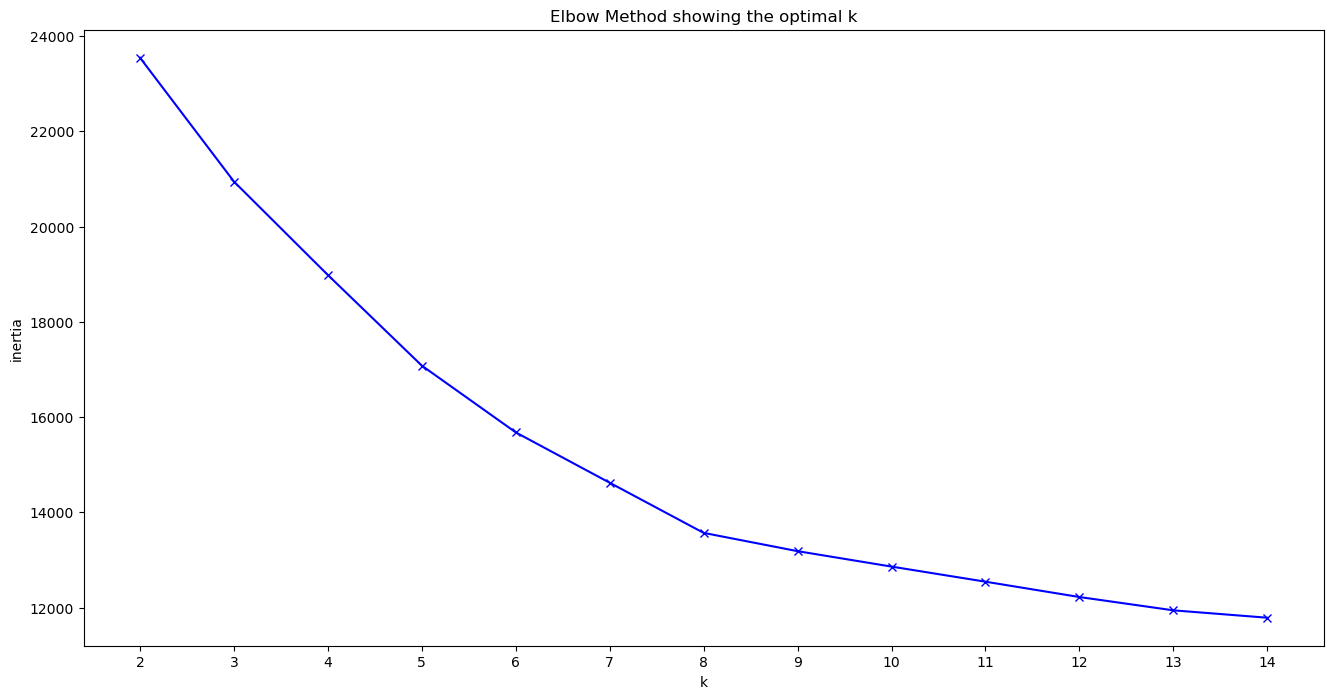

In [22]:
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Daniel Castañeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

Text(0.5, 1.0, 'Silhouette score vs k')

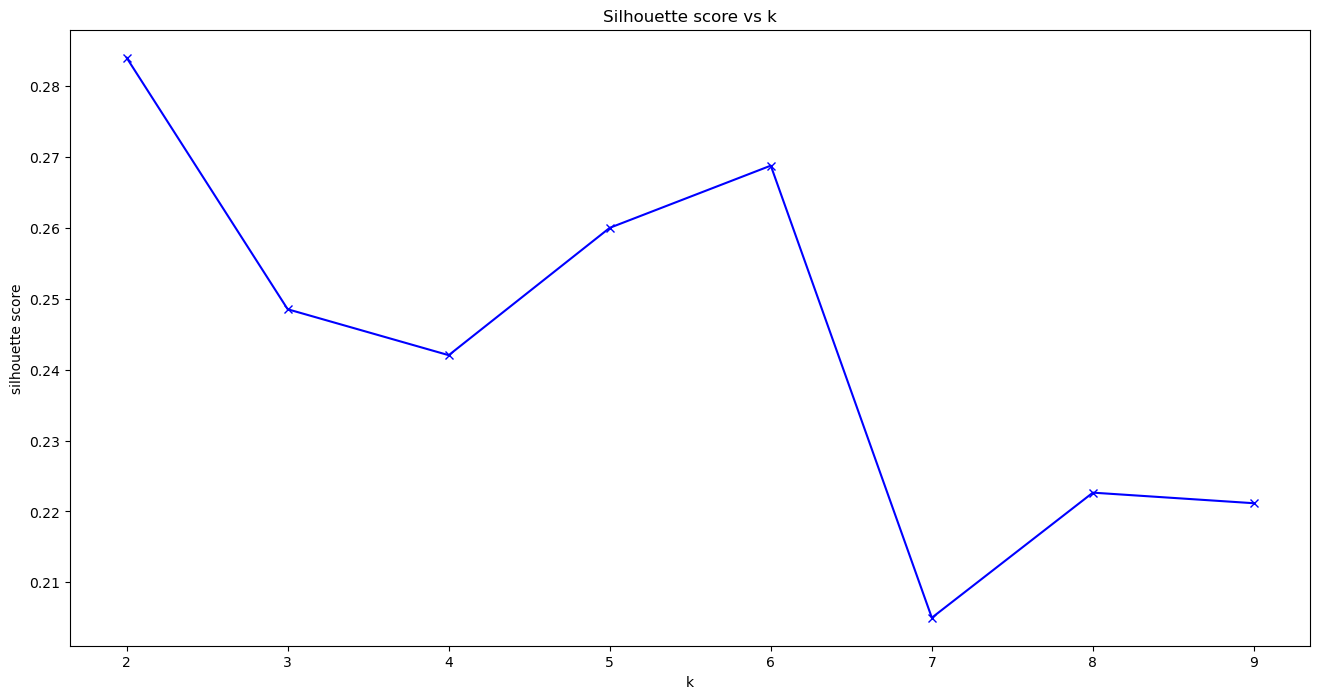

In [23]:
#k=8 could be our best bet as an elbow
#Let's check the silhouette score

K = range(2,10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters = k,
                   random_state = 42)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K,silhouette,'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K),max(K)+1, 1.0))
plt.title('Silhouette score vs k')

In [24]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,-0.126926,-1.508061,-0.569658,-0.795992,0.634434,-0.282491,1.719640,2.519465,-0.656436,-0.830021,-1.266019,-0.380380,0.220149,7
1,-1.538997,-1.895091,1.416934,-1.590696,0.634434,-0.244134,1.777495,-0.340483,-0.491541,-1.252490,-1.759722,-0.485663,0.220149,5
2,-0.787509,-0.887981,-0.002060,-0.343301,0.634434,-0.457834,1.329117,-0.333696,-0.559552,0.192590,2.998580,-0.117410,0.220149,5
3,-0.569335,-1.445637,-1.421054,-1.816329,-1.576209,-0.258381,1.285725,-0.362070,0.034584,-0.889246,-0.742723,0.069662,0.220149,5
4,-0.745086,-0.634123,-0.002060,-0.067792,0.634434,1.325194,0.093907,-0.370521,2.556134,0.986199,-0.642939,-0.035309,0.220149,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,0.970004,1.621468,-0.002060,0.131478,-1.576209,-0.193723,-1.088631,2.392481,0.939262,1.254684,-0.106205,2.782068,0.220149,0
1787,0.654864,1.592337,0.281739,1.037573,0.634434,-0.361395,-0.655319,-0.370521,-0.119404,0.354470,0.280673,0.046146,0.220149,1
1788,0.860917,0.560258,-0.853456,-0.399116,0.634434,-0.238655,-1.085415,3.565990,2.414979,0.409747,0.817550,0.322050,0.220149,7
1789,1.006367,0.572743,-0.569658,0.135516,-1.576209,-0.401944,-1.084923,-0.252732,-0.872661,1.562652,0.137609,3.788669,0.220149,0


In [25]:
data['cluster'] = X['cluster']
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track,artist,cluster
0,0.588,0.207,3,-12.622,1,0.0553,0.971,0.66000,0.0823,0.365,...,audio_features,1yvkKwvTiQmq0Saw1quM9l,spotify:track:1yvkKwvTiQmq0Saw1quM9l,https://api.spotify.com/v1/tracks/1yvkKwvTiQmq...,https://api.spotify.com/v1/audio-analysis/1yvk...,198733,4,West End Blues,Louis Armstrong & His Hot Five,7
1,0.355,0.114,10,-15.968,1,0.0588,0.991,0.00686,0.1080,0.258,...,audio_features,3cw8eL6EI64aCw9Mw6Ipgd,spotify:track:3cw8eL6EI64aCw9Mw6Ipgd,https://api.spotify.com/v1/tracks/3cw8eL6EI64a...,https://api.spotify.com/v1/audio-analysis/3cw8...,189600,4,St. Louis Blues,Bessie Smith,5
2,0.479,0.356,5,-10.716,1,0.0393,0.836,0.00841,0.0974,0.624,...,audio_features,6DIA7G45AQv9PkirGnHPb9,spotify:track:6DIA7G45AQv9PkirGnHPb9,https://api.spotify.com/v1/tracks/6DIA7G45AQv9...,https://api.spotify.com/v1/audio-analysis/6DIA...,221545,4,"T"" for Texas (Blue Yodel, No. 1)",Ramblin' Jack Elliott,5
3,0.515,0.222,0,-16.918,0,0.0575,0.821,0.00193,0.1900,0.350,...,audio_features,3BFRqZFLSrqtQr6cjHbAxU,spotify:track:3BFRqZFLSrqtQr6cjHbAxU,https://api.spotify.com/v1/tracks/3BFRqZFLSrqt...,https://api.spotify.com/v1/audio-analysis/3BFR...,237773,4,Ain't Misbehavin',Fats Waller,5
4,0.486,0.417,5,-9.556,1,0.2020,0.409,0.00000,0.5830,0.825,...,audio_features,6sXVv2wom0C6AJPSSeRfrK,spotify:track:6sXVv2wom0C6AJPSSeRfrK,https://api.spotify.com/v1/tracks/6sXVv2wom0C6...,https://api.spotify.com/v1/audio-analysis/6sXV...,228667,4,Wildwood Flower - Live at San Quentin State Pr...,The Carter Family,3


### Recommender song

In [26]:
def recommend_similar_song():
    while True:
        search_song = input("Hello! Please tell me a song you like: ")
        search_song = search_song.lower()
        print()

        # Search the song in the DataFrame
        matching_songs = data[data['track'].apply(lambda x: x.lower()).str.contains(search_song)]

        if not matching_songs.empty:
            print("We found the following matching songs:")
            for i, song_row in enumerate(matching_songs.iterrows(), start=1):
                song_name = song_row[1]['track']
                artist_name = song_row[1]['artist']
                print(f"{i}. {song_name} by {artist_name}")
            
            print()
            user_choice = input("Please enter the number of the song you meant, or 'no' if none of these are correct: ")

            if user_choice.lower() == 'no':
                print()
                print("Sorry about that. Let's try again.")
                print()
            elif user_choice.isdigit() and 1 <= int(user_choice) <= len(matching_songs):
                chosen_song = matching_songs.iloc[int(user_choice) - 1]
                cluster_id = chosen_song['cluster']
                
                # Find other songs in the same cluster, excluding the chosen song
                same_cluster_songs = data[(data['cluster'] == cluster_id) & (data['track'] != chosen_song['track'])]
                                  
                if not same_cluster_songs.empty:
                    random_recommendations = same_cluster_songs.sample(n=3)
                    print()
                    print("Here are 3 songs similar to the one entered that you might like:")
                    print()
                    for index, row in random_recommendations.iterrows():
                        print(f"Song: {row['track']}")
                        print(f"Artist: {row['artist']}")
                        print(f"Id: {row['id']}")
                        print(f"Cluster: {row['cluster']}")
                        print()
                break
            else:
                print("Invalid input. Please enter a valid number or 'no'.")
        else:
            print("No matching songs found. Please try again.")
            print()

In [27]:
data.iloc[:, -3:].head(40)

,track,artist,cluster
0,West End Blues,Louis Armstrong & His Hot Five,7
1,St. Louis Blues,Bessie Smith,5
2,"T"" for Texas (Blue Yodel, No. 1)",Ramblin' Jack Elliott,5
3,Ain't Misbehavin',Fats Waller,5
4,Wildwood Flower - Live at San Quentin State Pr...,The Carter Family,3
5,"Dark Was the Night, Cold Was the Ground",Blind Willie Johnson,2
6,"Swanee River - 1938, Standard transcription",Nat King Cole,5
7,Pony Blues,Charley Patton,7
8,Rhapsody In Blue,Various Artists,5
9,Crazy Blues,Mamie Smith,7


In [28]:
recommend_similar_song()

Hello! Please tell me a song you like:  take care



We found the following matching songs:
1. Drake feat. Rihanna - Take Care (Instrumental Version) by Ultimate Tribute Stars



Please enter the number of the song you meant, or 'no' if none of these are correct:  1



Here are 3 songs similar to the one entered that you might like:

Song: Ory's Creole Trombone
Artist: Black Bottom Stompers
Id: 4oKm0UirCX9TQHeW9hI9dQ
Cluster: 7

Song: Love Changes Everything (From "Aspects of Love")
Artist: John Williams
Id: 6dGbnQOPqPfj4BN6H4HSBp
Cluster: 7

Song: Kassie Jones (Casey Jones)
Artist: Furry Lewis
Id: 7KwwQHmnE9xEYMRLufyIc5
Cluster: 7



In [31]:
recommend_similar_song()

Hello! Please tell me a song you like:  california



We found the following matching songs:
1. California, Here I Come (Recorded 1924) by Al Jolson
2. California Love - Original Version by 2Pac
3. California Gurls by Katy Perry
4. California Love - Original Version by 2Pac
5. California Dreamin' - Single Version by The Mamas & The Papas
6. California Love - Original Version by 2Pac
7. Hotel California - 2013 Remaster by Eagles



Please enter the number of the song you meant, or 'no' if none of these are correct:  2



Here are 3 songs similar to the one entered that you might like:

Song: Adore - 2020 Remaster
Artist: Prince
Id: 7tyckyaQOzlsTjnujLinRt
Cluster: 1

Song: Jack & Diane
Artist: John Mellencamp
Id: 43btz2xjMKpcmjkuRsvxyg
Cluster: 1

Song: Bailando - Spanish Version
Artist: Enrique Iglesias
Id: 32lm3769IRfcnrQV11LO4E
Cluster: 1

